# Plot cortical spectral power at regions of interest

The spectral power in the TFR files is calculated across electrodes, whose locations vary by subject. To look at average activity across subjects, we project electrode-level power onto common regions of interest. The weighting matrices needed for this are computed in project_data_rois_matlab directory. This notebook will generate Figs. 3 and 4 from the paper.

In [1]:
%matplotlib notebook
import os,mne,glob,natsort
os.environ["OMP_NUM_THREADS"] = "1" #avoid multithreading if have Anaconda numpy
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm #useful for seeing progress
from matplotlib import gridspec
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import config
from tfr_utils import load_project_spectral_power,plot_specs_group,plot_specs_single_region

### Set parameters

In [2]:
tfr_lp = '.../naturalistic_reaches/tfr/'
roi_proj_loadpath = '.../roi_proj_matlab/'
n_subjs = 12

rem_bad_chans = True #don't use bad channels for ROI projection
elec_dens_thresh = 3 #threshold for dipole density

atlas = config.constants_plot_tfr['atlas']

### Determine which ROI's to plot based on electrode density

In [3]:
#Load in electrode to ROI weight matrices
for s in range(n_subjs):
    df = pd.read_csv(roi_proj_loadpath+atlas+'_'+str(s+1).zfill(2)+'_elecs2ROI.csv')
    if s==0:
        elec_densities = df.iloc[0]
    else:
        elec_densities += df.iloc[0]
elec_densities = elec_densities/n_subjs 

#Select ROI's that have electrode density above threshold
good_rois = np.nonzero(np.asarray(elec_densities)>elec_dens_thresh)[0]
roi_labels = df.columns.tolist()
print('Selected '+str(len(good_rois))+' regions')

Selected 8 regions


### Plot group average spectral power across selected regions

In [4]:
power_roi = load_project_spectral_power(tfr_lp,roi_proj_loadpath,good_rois,n_subjs,
                                        atlas=atlas,rem_bad_chans=rem_bad_chans)

Reading /data1/users/stepeter/mvmt_init/data_release/naturalistic_reaches/tfr/subj_01_day_3_r_allEpochs_tfr.h5 ...
Adding metadata with 21 columns
Reading /data1/users/stepeter/mvmt_init/data_release/naturalistic_reaches/tfr/subj_01_day_4_r_allEpochs_tfr.h5 ...
Adding metadata with 21 columns
Reading /data1/users/stepeter/mvmt_init/data_release/naturalistic_reaches/tfr/subj_01_day_5_r_allEpochs_tfr.h5 ...
Adding metadata with 21 columns
Reading /data1/users/stepeter/mvmt_init/data_release/naturalistic_reaches/tfr/subj_01_day_7_r_allEpochs_tfr.h5 ...
Adding metadata with 21 columns
Reading /data1/users/stepeter/mvmt_init/data_release/naturalistic_reaches/tfr/subj_02_day_3_l_allEpochs_tfr.h5 ...
Adding metadata with 21 columns
Reading /data1/users/stepeter/mvmt_init/data_release/naturalistic_reaches/tfr/subj_02_day_4_l_allEpochs_tfr.h5 ...
Adding metadata with 21 columns
Reading /data1/users/stepeter/mvmt_init/data_release/naturalistic_reaches/tfr/subj_02_day_5_l_allEpochs_tfr.h5 ...
Add

### Compute median power for each patient

In [5]:
patients_unique_labels = power_roi.metadata['patient_id'].unique()
print(patients_unique_labels)

power_roi_subj_ave = power_roi.copy()
power_roi_subj_ave.data = power_roi_subj_ave.data[:len(patients_unique_labels),...]
for s,patID in enumerate(patients_unique_labels):
    pat_inds = np.nonzero(power_roi.metadata['patient_id'].values==patID)[0]
    power_roi_subj_ave.data[s,...] = np.median(power_roi.data[pat_inds,...],axis=0)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11']


### Plot spectrograms across all subjects

<IPython.core.display.Javascript object>


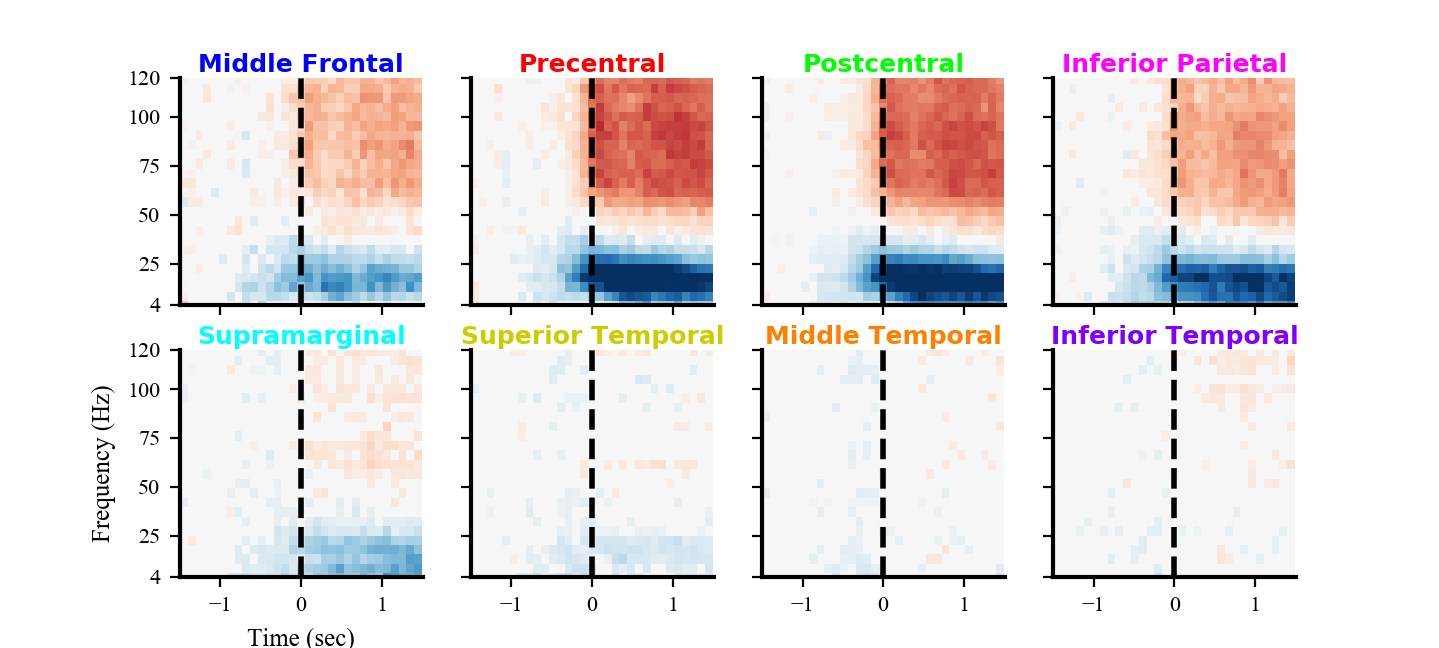

In [6]:
plot_specs_group(power_roi_subj_ave,roi_labels,good_rois,averagePower=False,useMedian=False)

### Plot spectrograms for 1 region, shown across all subjects

<IPython.core.display.Javascript object>


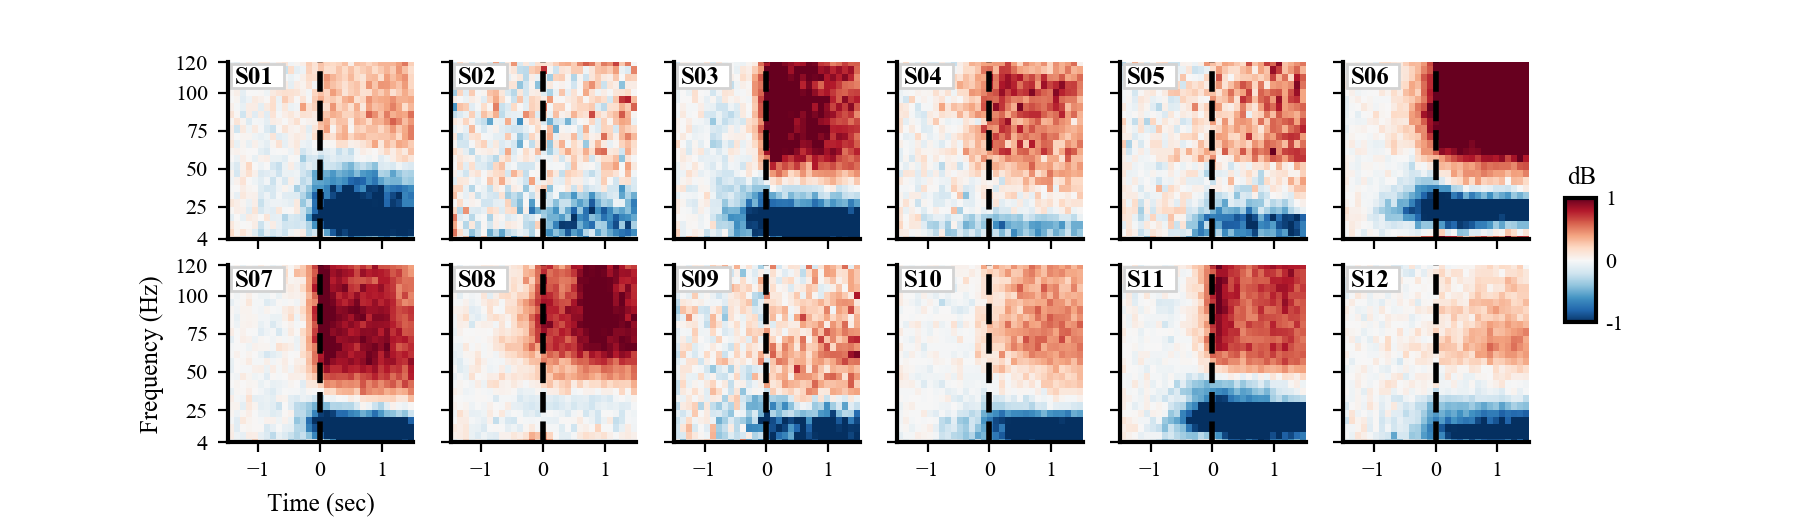

<IPython.core.display.Javascript object>

In [7]:
region_label = 'Postcentral' #pick any of 8 good regions from previous cell to plot

plot_specs_single_region(power_roi_subj_ave,region_label,roi_labels,
                         good_rois,n_subjs=n_subjs,averagePower=False,n_rows=2,n_cols=6)